In [1]:
%matplotlib inline

In [2]:
import json
import os
import matplotlib.pyplot as plt
from AxonDeepSeg.testing.segmentation_scoring import *
from time import time
import pickle
import cv2
import tensorflow as tf
from scipy.misc import imread, imsave, imshow

In [5]:
from AxonDeepSeg.apply_model import axon_segmentation

/Users/mulab_admin/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
pwd

u'/Users/mulab_admin/Documents/project_al/activelearningADS'

In [7]:
path_testing = "/Users/mulab_admin/Documents/Axondeepseg"

model_name = 'default_SEM_model_v1'
path_model = "/Users/mulab_admin/Documents/Axondeepseg/AxonDeepSeg/models/default_SEM_model_v1"

In [8]:
# Read the parameters of the selected model
path_configfile = os.path.join(path_model,'config_network.json')

if not os.path.exists(path_model):
    os.makedirs(path_model)

with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())

## AxonDeepSeg prediction

In [10]:
path_img = '/Users/mulab_admin/Documents/CEAL/CEAL-Medical-Image-Segmentation/src/data/results/08_17/sample.png'
pic = cv2.imread(path_img)
print(pic.shape)
pic = cv2.resize(pic, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
cv2.imwrite("comparision.png", pic)

(512, 512, 3)


True

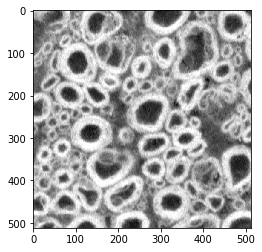

In [205]:
plt.imshow(pic)
plt.show()

In [195]:
# reset the tensorflow graph for new testing
tf.reset_default_graph()

prediction, proba_map = axon_segmentation([path_testing], ["comparision.png"], path_model, 
                               config_network,verbosity_level=3,  
                               prediction_proba_activate=True)

Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...
Beginning inference ...
processing patch 1 of 1


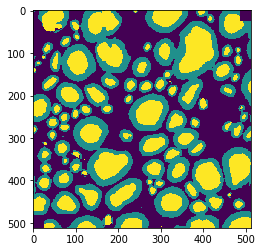

In [196]:
plt.imshow(prediction[0])
plt.show()

In [197]:
ads = prediction[0]
#ads[ads == 1] = 255
#ads[ads == 2] = 0
ads.shape

(512, 512)

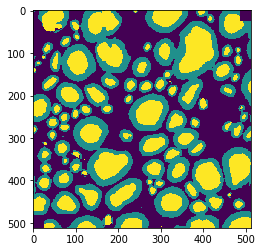

In [198]:
#ads = np.logical_and(prediction[:,:] >= 1, prediction[0][:,:] < 2)
plt.imshow(ads)
plt.show()

## CEAL prediction

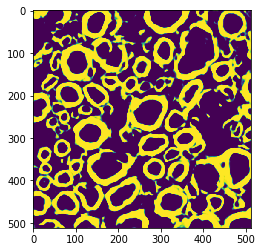

In [199]:
path_prediction = '/Users/mulab_admin/Documents/CEAL/CEAL-Medical-Image-Segmentation/src/data/results/08_17/prediction.png'
pred = cv2.imread(path_prediction)[:, :, 0]
#pred[pred > 127 ] = 255
#pred[pred <= 127] = 0
plt.imshow(pred)
plt.show()

## GT

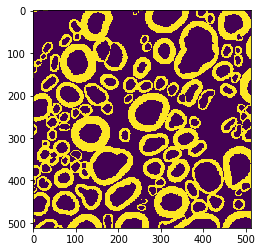

In [201]:
path_gt = '/Users/mulab_admin/Documents/CEAL/CEAL-Medical-Image-Segmentation/src/data/results/08_17/mask.png'
mask = cv2.imread(path_gt)[:, :, 0]
plt.imshow(mask)
plt.show()


## Metrics

In [202]:
###ADS####
# Create object to manage segmentation metrics for myelin mask
ads_metrics = Metrics_calculator(ads, mask)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', ads_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',ads_metrics.pw_accuracy())
print('Pixelwise Dice:',ads_metrics.pw_dice())
print('Pixelwise F1 score:',ads_metrics.pw_F1_score())
print('Pixelwise False negative rate:',ads_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',ads_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',ads_metrics.pw_jaccard())
print('Pixelwise Precision:',ads_metrics.pw_precision())
print('Pixelwise Specificity:',ads_metrics.pw_specificity())

ads_metrics_array = np.array([ads_metrics.pw_sensitivity(),ads_metrics.pw_specificity(),ads_metrics.pw_precision(),
                        ads_metrics.pw_accuracy(), ads_metrics.pw_F1_score(), ads_metrics.pw_dice(), 
                        ads_metrics.pw_jaccard()])

('Pixelwise Sensitivity:', 0.0032115312023042633)
('Pixelwise Accuracy:', 0.6227188110351562)
('Pixelwise Dice:', 0.9073903054329219)
('Pixelwise F1 score:', 0.006398319596337816)
('Pixelwise False negative rate:', 0.9967884687976958)
('Pixelwise False positive rate:', 0.16592177080075465)
('Pixelwise Jaccard index:', 0.8304798227078287)
('Pixelwise Precision:', 0.8304798227078287)
('Pixelwise Specificity:', 0.8340782291992453)


In [203]:
###CEAL####
# Create object to manage segmentation metrics for myelin mask
ceal_metrics = Metrics_calculator(pred, mask)

# Compute and display results (pixelwise metrics):
print('Pixelwise Sensitivity:', ceal_metrics.pw_sensitivity())
print('Pixelwise Accuracy:',ceal_metrics.pw_accuracy())
print('Pixelwise Dice:',ceal_metrics.pw_dice())
print('Pixelwise F1 score:',ceal_metrics.pw_F1_score())
print('Pixelwise False negative rate:',ceal_metrics.pw_FN_rate())
print('Pixelwise False positive rate:',ceal_metrics.pw_FP_rate())
print('Pixelwise Jaccard index:',ceal_metrics.pw_jaccard())
print('Pixelwise Precision:',ceal_metrics.pw_precision())
print('Pixelwise Specificity:',ceal_metrics.pw_specificity())

ceal_metrics_array = np.array([ceal_metrics.pw_sensitivity(),ceal_metrics.pw_specificity(),ceal_metrics.pw_precision(),
                        ceal_metrics.pw_accuracy(), ceal_metrics.pw_F1_score(), ceal_metrics.pw_dice(), 
                        ceal_metrics.pw_jaccard()])

('Pixelwise Sensitivity:', 0.0034604209840712933)
('Pixelwise Accuracy:', 0.7804718017578125)
('Pixelwise Dice:', 0.9739550903410015)
('Pixelwise F1 score:', 0.00689570372232014)
('Pixelwise False negative rate:', 0.9965395790159287)
('Pixelwise False positive rate:', 0.03792495058239265)
('Pixelwise Jaccard index:', 0.9492324177746676)
('Pixelwise Precision:', 0.9492324177746676)
('Pixelwise Specificity:', 0.9620750494176074)


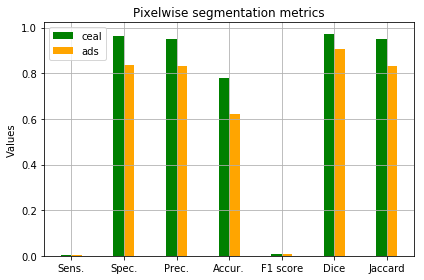

In [204]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)

rects1 = plt.bar(index-0.1, ceal_metrics_array, width=0.2, color='green',label='ceal')
rects2 = plt.bar(index+0.1, ads_metrics_array, width=0.2, color='orange',label='ads')

plt.ylabel('Values')
plt.title('Pixelwise segmentation metrics')
plt.xticks(index, ('Sens.', 'Spec.', 'Prec.', 'Accur.', 'F1 score','Dice','Jaccard'),fontsize=10)
plt.legend(loc='best')
plt.grid(True)
#plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()